In [ ]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('survey.csv', sep=';')
df2 = pd.read_csv('steps.csv', sep=';')
df1.head()

In [66]:
# add the average steps per day per id, I do this for the plot later.
df2['average'] = df2.mean(numeric_only=True, axis=1)
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364


In [80]:
# merge the two databases on 'id'
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364


In [81]:
# retrieve the highest value
df["average"].max()

168225.66666666666

In [90]:
## remove +65000 steps, that is around 50 km (for the daily marathon runners and pilgrims :) )
def above_65000(x):
    if(x > 65000.0): 
        return float('NaN')
    else: 
        return x
df['average'] = df['average'].apply(above_65000)

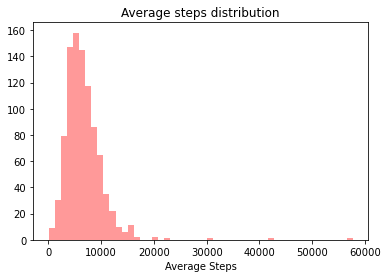

In [110]:
df['average'].name = 'Average Steps' #Labeling the variable for plotting
average_steps = df['average'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(average_steps, kde=False, color = 'red') 
plt.title('Average steps distribution')
plt.show()

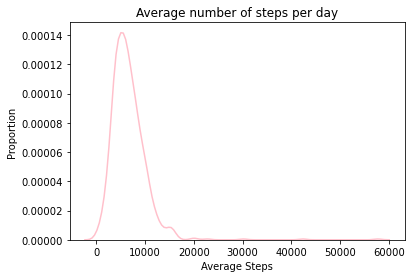

In [111]:
# measures of variation
df['average'].name = 'Numer of steps per day'  
sns.distplot(average_steps, kde=True, hist=False, color = 'Pink') 
plt.title('Average number of steps per day')
plt.ylabel('Proportion')
plt.show()

In [112]:
# Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
mean_size = df['average'].mean()
median_size = df['average'].median()
variance = df['average'].var()

print(f'The median steps per day is: {median_size} steps')
print(f'The mean steps per day is: {mean_size} steps')
print(f'The variance is: {variance} steps')


The median filesize is: 6075.865 steps
The mean filesize is: 6636.34843930698 steps
The variance is: 13829380.431264399 steps


### Description
The distribution is right skewed. This means that the mean is higher than the median. 
The outliers have been removed. The highest value was 168225 steps, which is over 100 km. 
All the values above 65.000 steps have been removed, which is around 50 km.
The distribution is pretty normal, with only another peak around 15.000 steps in addition to the highest peak at 6000.